# Steps of HW2:

* write imports here some recommended imports.

<code>
    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    import math
</code>

* use np.mod(ID,3) to know reminder after division by 3 to know you function f
* use numpy to generate the cord of the region matplot(plt) and plt.contour to draw the function contours.


* write a def for :
    $f$,$df$,$\frac{df}{dx}$, $\frac{df}{dy}$,$\frac{d^2f}{dx^2}$, $\frac{d^2f}{dxdy}$, $\frac{d^2f}{dydx}$, $\frac{d^2f}{dy^2}$   
* write a def for Jacobian at X as jacobian(X) = \[$\frac{df}{dx}$, $\frac{df}{dy}$\]
* write a def for Hessian at X as Hessian(X) = $\begin{bmatrix} \frac{d^2f}{dx^2} & \frac{d^2f}{dxdy}\\ \frac{d^2f}{dydx} & \frac{d^2f}{dy^2}\end{bmatrix}$


* note: X here is the pair (x,y) taken as input in f.

## Algorithms:

### Before writing an algorithm:

   * write a code that generate a list sample points in the region given
    * np.random.uniform is very helpful function here\
    
### Note:
    for the stopping condition use math.dist(x1,x2) to get the euclidean distance also numpy has a function for it as well
    or you can you |f(x1)-f(x2)| as a condition as well
 
### Random Search (RS): 
    
   * Take the first sample point from the list as X_min
   * Start a for loop over the length of the sample point list -1
   * At every iteration of the loop check the current point X_min against X_next:
   * if function at X_next is less than function at X_i then take X_i as x_min. else skip to the next sample point
        * also check the stopping condition if X_i is taken if true break from the loop
   * continue till you loop through all the sample points
   * Note: save the initial sample point and all the samples that are taken in a list to plot them later
        
### Gradient Descent (GD): 
* Take the input sample point
* added to the list of point for plotting later on
* start the loop
* calculate the Gradient at the point. here the Jacobian is the Gradient of $f$
* make an new Point cord as the following:
    since the gradient is the Jacobian that equals \[$\frac{df}{dx}$, $\frac{df}{dy}$\]:
    * x = x+ alpha*grad\[0\]
    * y = y+ alpha*grad\[1\]
        *NOTE: in Gradient descent a factor alpha is used in the update step to make the convergence less steep. This make sure the new points do not rush of away and divergence since the gradient can grow really quick.
        
* test the new point with the current point, if the condition is meet exist the loop
* if not, then add the new point to the point list
* Set the new point as the current point and loop over.

    
### Newton Method (NM) : 
* Take the input sample point
* added to the list of point for plotting later on
* start the loop
* calculate the Gradient at the point. here the Jacobian is the Gradient of $f$ and calculate the Hessian at the point.
* calculate the Hessian inverse (IH) this is just a normal 2x2 matrix inverse.

* make an new Point cord as the following:
    with the Gradient/Jacobian that equals \[$\frac{df}{dx}$, $\frac{df}{dy}$\]
    and IH a 2x2 matrix:
    * $x = x - IH[0][0]*jac[0] + IH[0][1]*jac[1])$
    * $y = y - IH[1][0]*jac[0] + IH[1][1]*jac[1])$
* test the new point with the current point, if the condition is meet exist the loop
* if not, then add the new point to the point list
* Set the new point as the current point and loop over.

## Plotting the points:
   To plot the point from every algorithm:
   * First draw the contour map of f but do not show the plot.
   * Use plt.scatter(x,y) where x is the list of x cords of the points that you saved when running the algorithm
     and y x is the list of y cords of those point.
    * plt.scatter will plot the points marker only with no connections
    * Use plt.plot(x,y) to plot the line connecting the point
    * Also you plot the min value on its own with plt.plot
    * Note: you can change many attribute such as color, stroke-size and marker-shape in plt if you want.
    

# Necessary Imports

In [337]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import symbols, diff, lambdify,sympify
from tqdm import tqdm

plt.style.use('ggplot')

# Defining the objective function and all the needed derivatives
   ## The function derivatives in python and markdown/latex

In [338]:
# Since my_ID mod 3 = 2. I will go with function 3 as per the rules.
#the function that I got was the goldstein-price function

np.mod(201693140,3)

2

# Setting up the function and the needed derivatives 

In [339]:
#the function that I got was the goldstein-price function
#using Sympy to calculate the derivatives here since the function has so much multiplications the derivatives
#are a huge expressions and too much to do by hand

#set x and y as my symbols
x, y = symbols('x y', real=True)

#The goldstein-price function in python
expr = (1+(x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+(2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))

#setting python lambdas using Sympy to calculate  the function and the derivatives of it.
f = lambdify([(x,y)],expr,'numpy')

dfdx  = lambdify([(x,y)],diff(expr,x),'numpy')
dfdy  = lambdify([(x,y)],diff(expr,y),'numpy')

dfdx2 = lambdify([(x,y)],diff(expr,x,x),'numpy')
dfdxy = lambdify([(x,y)],diff(expr,x,y),'numpy')

dfdyx = lambdify([(x,y)],diff(expr,y,x),'numpy')
dfdy2 = lambdify([(x,y)],diff(expr,y,y),'numpy')
 

# Here are the derivatives in latex generated  by the Sympy


In [340]:
sympify(expr)

((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1)

In [341]:
sympify(diff(expr,x))

((2*x - 3*y)**2*(24*x - 36*y - 32) + (8*x - 12*y)*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18))*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1) + ((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*((x + y + 1)**2*(6*x + 6*y - 14) + (2*x + 2*y + 2)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19))

In [342]:
sympify(diff(expr,y))

((-12*x + 18*y)*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + (2*x - 3*y)**2*(-36*x + 54*y + 48))*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1) + ((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*((x + y + 1)**2*(6*x + 6*y - 14) + (2*x + 2*y + 2)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19))

In [343]:
sympify(diff(expr,x,x))

2*(-8*(2*x - 3*y)*(x + y + 1)*(-12*x**2 + 36*x*y + 32*x - 27*y**2 - 48*y + (2*x - 3*y)*(-6*x + 9*y + 8) - 18)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + (x + y + 1)*(3*x + 3*y - 7) + 19) + ((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 3*(x + y + 1)**2 + 4*(x + y + 1)*(3*x + 3*y - 7) + 19) + 4*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1)*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 3*(2*x - 3*y)**2 - 4*(2*x - 3*y)*(-6*x + 9*y + 8) + 18))

In [344]:
sympify(diff(expr,x,y))

2*(2*(2*x - 3*y)*(x + y + 1)*(-12*x**2 + 36*x*y + 32*x - 27*y**2 - 48*y + (2*x - 3*y)*(-6*x + 9*y + 8) - 18)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + (x + y + 1)*(3*x + 3*y - 7) + 19) + ((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 3*(x + y + 1)**2 + 4*(x + y + 1)*(3*x + 3*y - 7) + 19) - 6*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1)*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 3*(2*x - 3*y)**2 - 4*(2*x - 3*y)*(-6*x + 9*y + 8) + 18))

In [345]:
sympify(diff(expr,y,x))

2*(2*(2*x - 3*y)*(x + y + 1)*(-12*x**2 + 36*x*y + 32*x - 27*y**2 - 48*y + (2*x - 3*y)*(-6*x + 9*y + 8) - 18)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + (x + y + 1)*(3*x + 3*y - 7) + 19) + ((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 3*(x + y + 1)**2 + 4*(x + y + 1)*(3*x + 3*y - 7) + 19) - 6*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1)*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 3*(2*x - 3*y)**2 - 4*(2*x - 3*y)*(-6*x + 9*y + 8) + 18))

In [346]:
sympify(diff(expr,y,y))

2*(12*(2*x - 3*y)*(x + y + 1)*(-12*x**2 + 36*x*y + 32*x - 27*y**2 - 48*y + (2*x - 3*y)*(-6*x + 9*y + 8) - 18)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + (x + y + 1)*(3*x + 3*y - 7) + 19) + ((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 3*(x + y + 1)**2 + 4*(x + y + 1)*(3*x + 3*y - 7) + 19) + 9*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1)*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 3*(2*x - 3*y)**2 - 4*(2*x - 3*y)*(-6*x + 9*y + 8) + 18))

# The Plotting

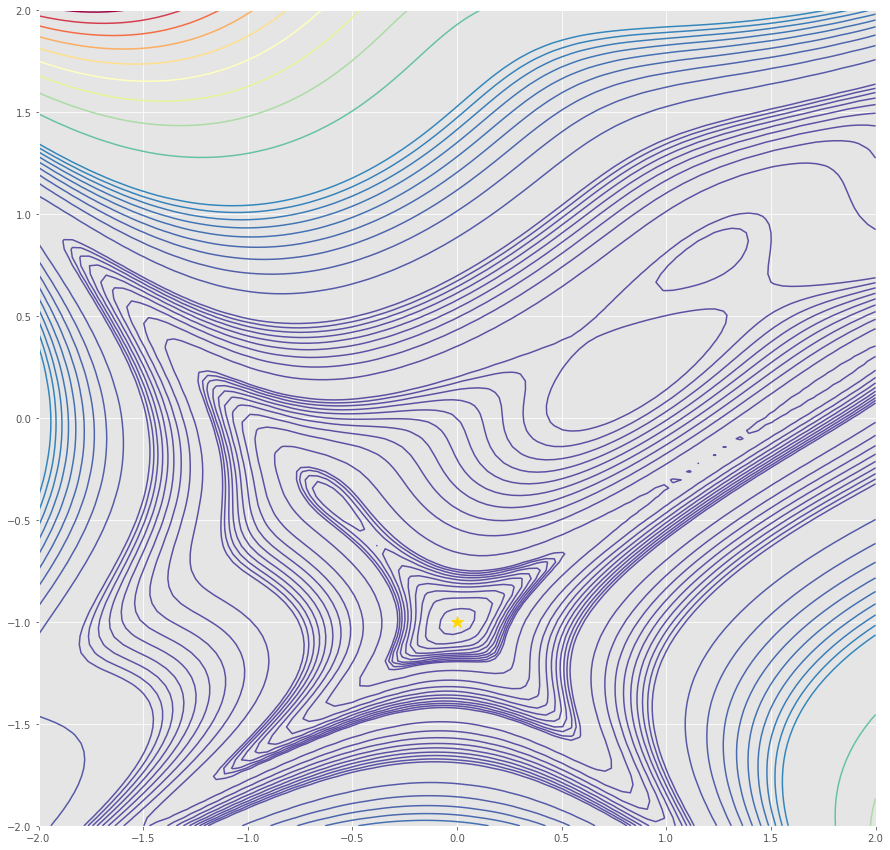

In [347]:
#set fig size
plt.figure(figsize=(15,15))

#define the region, I use (-3,3)X(-3,3) to get a nicer plot.
region_x1 = np.linspace(-2, 2, 100)
region_x2 = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(region_x1, region_x2)

#get the function output to plot
Z = f([X, Y])

#set the contour line level 
levels = (   [5,10,15,20,25,30,35,40,45,50]
            +[100,200,300,400,500,600,700,800,900,1000]
            +[2000,3000,4000,5000,6000,7000,8000,9000,10000]
            +[20000,30000,40000,50000,60000,70000,80000,90000,100000]
            +[200000,300000,400000,500000,600000,700000,800000,900000,1000000]
         )


#set the plot lines color theme and show a legend
#colors=['#808080', '#A0A0A0', '#C0C0C0']
plt.contour(X, Y, Z,levels,cmap=plt.cm.Spectral_r);
#plot the actual minima point
plt.plot(0,-1,'*',markersize=12,color="gold")
plt.show()


# We wrap the plotting code in a function for re-usability.

In [348]:
def plot_optim(path=[],name= None ,size= 10):
    """
    Takes a point path and plots the function contour and then plots over it the path
    also highlights the min point as golden star and the last point in the path with red star
    Parameters:
      path - list of the points to plot in order to get the path followed by the algorithm run.
      size - plot figure size with default value of 10
    """
    #set figure size
    plt.figure(figsize=(size,size))
    
    #plot the contour
    levels = (   [5,10,15,20,25,30,35,40,45,50]
            +[100,200,300,400,500,600,700,800,900,1000]
            +[2000,3000,4000,5000,6000,7000,8000,9000,10000]
            +[20000,30000,40000,50000,60000,70000,80000,90000,100000]
            +[200000,300000,400000,500000,600000,700000,800000,900000,1000000]
         )
    plt.contour(X, Y, Z,levels,cmap=plt.cm.Spectral_r,zorder=5);

    #seperate path cord
    path_x = []
    path_y = []

    for i in range(len(path)):
        path_x.append(path[i][0])
        path_y.append(path[i][1])

    # plot the path given
    plt.scatter(path_x,path_y,zorder=10,color='#FF6A00')  
    plt.plot(path_x,path_y,linewidth=2,zorder=10,color='#FF6A00')  

    #plot the actual minima point
    plt.plot(0,-1,'*',markersize=15,color="gold",zorder=15)
    
    # if path is given plot the last point on it
    if path:
        plt.plot(path[-1][0],path[-1][1],'*',markersize=12,color="red",zorder=15)
        
    #if name is given for the plot use it
    if name:
        plt.title(name)
        
    #show the plot
    plt.show()
    
    # if path is given print the following stat:
    # best point/guess, i.e the last point on the path.
    # the function value of the last point on the path.
    # initial point taken as input for the algorithm run.
    # the path length.
    if path:
        print(f'Best point we got is: {path[-1]} with value = {f(path[-1])}\nFrom Initial Point {path[0]}\nPath length = {len(path)}')

# Define the Jacobian and Hessian of the function

Let Jacobian of $f$ be

Jacob(x,y):
$$\begin{bmatrix}
\frac{df}{dx} & \frac{df}{dy}\\
\end{bmatrix}$$

Let Hessian  of $f$ be

Hess(x,y):
$$\begin{bmatrix}
\frac{d^2f}{dx^2} & \frac{d^2f}{dxdy}\\
\frac{d^2f}{dydx} & \frac{d^2f}{dy^2}
\end{bmatrix}$$


In [349]:
def jacob(X):
    return [dfdx(X),dfdy(X)]

def hessian(X):
    return [[dfdx2(X),dfdxy(X)],
            [dfdyx(X),dfdy2(X)]]

# Extra functions to help with Newton Method

In [350]:
# Method for determinant calculation
def det(M):
    return M[0][0]*M[1][1] - M[0][1]*M[1][0]

# Method for 2x2 matrix inverse calculation
def inverse(H):
    deter = det(H)
    a = H[0][0]*(1/deter)
    b = H[0][1]*(1/deter)
    c = H[1][0]*(1/deter)
    d = H[1][1]*(1/deter)
    
    return [[d,-b],[-c,a]]

# Sampels Generation

Using np.random.uniform we sample a sample with 2 dimensions. we do this 10000 times and save the samples generated in a list to get a list of 10000 samples from the region (-2,2)X(-2,2) 

In [362]:
#sample the point into an array
samples = []
for _ in tqdm(range(10_000+1)):
    samples.append(np.random.uniform(-2,2,2).tolist())


100%|████████████████████████████████████████████████████████████████████████| 10001/10001 [00:00<00:00, 162072.32it/s]


<h1 style="font-size: 50px" >Random Search</h1>

Random search is done by generating point in the the ROI and loop through them, setting the one that returns the minimum   function output as our best sample/choice

In [363]:
def RS(samples,f):
    """
    Parameters:
      sample - list of sampled point.
      f - the function to random search through.
    """
    #take the first sample as out best one  
    best_sample = samples[0]
    
    #add it to the path
    search_path = [samples[0]]

    #search loop
    for i in tqdm(range(len(samples)-1)):
        # load the next sample
        next_sample = samples[i]
        
        #compare current best sample with next sample and take the one with minima function value output
        if f(next_sample,) < f(best_sample,):
            if math.dist(best_sample,next_sample) < 10**-3:
                print("STOP")
                print(math.dist(best_sample,next_sample))
                break
                
            #add the selected point the  path
            search_path.append(next_sample)
            best_sample = next_sample


    #return the search path
    return search_path

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 201952.16it/s]


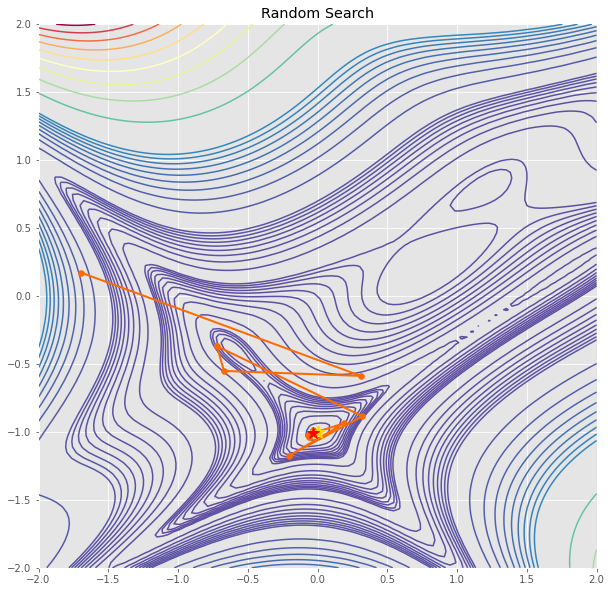

Best point we got is: [-0.03565665598870549, -1.0072055116728178] with value = 3.2955005087084355
From Initial Point [-1.6955154507007122, 0.17217429260061712]
Path length = 11


In [364]:
#run the search and get the point path and plot it using the plotting method.
plot_optim(RS(samples,f),name="Random Search")

# Notes:

* Random search is very quick algorithm to run

* In multidimensional optimization problems where d is small. Random search with uniform sampling can be very powerful

    * But if the dimension d is very large then the Random search algorithm becomes very inefficient since the likely hood of landing on a global minima becomes very low and the number of samples needed increases as well 

    

# Performance with the goldstein-price function:

Since the algorithm used pre-defined samples point that do not get updated, unlike gradient descent and newton method. the function features such as many local minimas around the global min and the unevenness of the surface of the function do not interfere with the algorithm run.



Therefore in theory all that we need to actually get a good guess of the global min is large enough number of sample and good guess of the region that enclose the global min. And since we have been given the region (-2,2)X(-2,2) we get "decent" results but the limit here is the $10^{3}$ sample which is not that large of number for this use.



a run with $10^{7}$ samples still does not get us closer to the min than the $10^{3}$ sample run. Therefore in practice Random search in that great for optimization and have limited uses.

<h1 style="font-size: 50px" >Gradient Descent</h1>



In Gradient Descent we use $grad(f(x))$ to get a vector that points to the greatest increase for a point cord X. then we move our current location point in the opposite direction.



When using GD we do not follow the change all at once but instead we multiply the gradient with a factor, here I call it the learning rate due to my experience with GD in Deep Learning.


The GD method while great at any dimension d, it is nor guaranteed to converge and might get stuck in a local minima or the gradient might go very very big, we call that in deep learning gradient explosion.

In [354]:
def GD(X,lr=1e-2,eps=10**-3,append_every=5,time_out=100_000):
    """
    Parameters:
      X   - Starting point.
      lr  - a number multiplied with the gradient to adjust the rate at which a point position is updated
      eps - epsilon is the value for the stopping condition
      append_every - value used to append every X point to the path.
      time_out - a limit of iteration to stop infinite run
      Returns:
      path - a list point that the algorithm run has made and followed
    """
    
    #set the first sample as the initial point on the path
    path = [X]
    #use a counter to check if the GD is stuck bouncing in a reigon
    iterations = 0

    

    #start the loop
    for _ in tqdm(range(time_out)):
        
        #calculate the gradient
        #the gradient might explode, basicly overflows, therefore I use try block to catch the overflow error
        try:
            grad = jacob(X)

        except:
            print("Gradient exploded.")
            break

        #check that the values of gradient are not Nan or Inf.
        if np.isnan(grad).any() or np.isinf(grad).any():
            print("Gradient went to Inf or became Nan.")
            break     

        #calculate the new position
        new_x = X[0]-(lr*grad[0])
        new_y = X[1]-(lr*grad[1])

        #check the stopping condition
        if math.dist(X,[new_x,new_y]) < eps: 
            print("STOP")
            break

        #a Time out check if the GD is takeing a lot of iteration to converge.
        if iterations == time_out:
            print("Time out.")
            break 

        #since the GD might take a lot of steps to converge I use a mod function to add a point every X iteration.
        if np.mod(iterations,append_every) == 0:
            path.append(X)

        #increase the counter and update X
        iterations += 1
        X = [new_x,new_y]

    #return the points path 
    return path

  0%|                                                                                       | 3/100000 [00:00<?, ?it/s]


Gradient exploded.


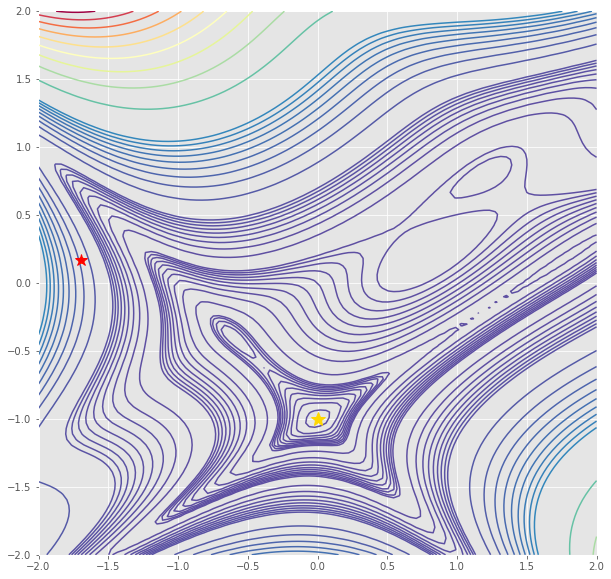

Best point we got is: [-1.6955154507007122, 0.17217429260061712] with value = 27329.834997222344
From Initial Point [-1.6955154507007122, 0.17217429260061712]
Path length = 2


In [365]:
plot_optim(GD(samples[0]))

# Notes:

Gradient Descent algorithm is well know optimization algorithm in Machine learning(ML). since it scales well with dimensionality

and it is not that hard or expensive to compute the first derivatives of a function



but as we can see from the code checks, gradient descent is prone to a lot of problems most notable when the gradient increase to infinity and the gradient is not a guaranteed to converge:


In ML gradient explosion is dealt with using gradient clipping where the grad(f) value is set to a max. e.g         $min(val_{max},grad(f))$ And for the gradient settling in local minimas, A "momentum" is introduced. Momentum is basically the adjustment of the learning rate as the gradient descent algorithm moves along to give the algorithm a better chance to "skip" over local minima. one optimizer that i have used with such feature is the well-know Adam optimizer.



Here we get another possible problem, as we can observe from the above figures, choosing good stopping condition $\epsilon$ and learning rate $lr$ greatly affect the algorithm ability to converge. Gradient Descent with $lr = 10^{-3}$ at $P_{intial}$ might diverge or even explode within 1 or 2 iteration but if we used $lr = 10^{-4}$ at the same point $P_{intial}$ well converge with no problem.



Lastly the gradient descent does not completely converge per se put gets very close the minima and settles near it. The problem is that the gradient might also get near but so near to trigger the stopping condition thus the algorithm get stuck bouncing around for ever less stopped. In the code I put an iteration time out and in ML the model training using gradient descent is done in rounds called epochs with extra optimizations like the previously mentioned momentum but also with early stopping checks being used as well.



# Performance with the goldstein-price function:



It is really bad. The function has so many local minima around the global minima and also the values of the function is sensitive for small inputs thus making it hard to approach the global minima without a gradient explosion. Lastly the function has this corrugations of an X shape at the center were the minima exist that I think is causing weird behavior with the Gradient descent algorithm.



The goldstein-price function was designed to test optimizes and it really showed how hard it is to get optimization right. The algorithm rarely worked and almost always went to infinities or just got stuck in a local minima. In order to get the gradient descent to work the starting point $P$ needs to be very close to the actual global minima.  


<h1 style="font-size: 50px" >Newton Method</h1>

Newton Method for multidimensional function is the generalization of the well know Newton Method.



The standard equation fo NM is $x_{i+1} = x_i - \frac{f}{f'}$

for optimization instead of $\frac{f}{f'}$ we use the first and seconde derivatives of f $\frac{f'}{f''}$

but since we will you two variable function the derivative of a function $f(x,y)$ is actually a vector/matrix of the partial derivatives of function with respect every to ever variable.

for example:

$f'(x,y) = \begin {bmatrix} \frac{df}{dx},\frac{df}{dy} \end{bmatrix}$ 

and

$f''(x,y) = \begin {bmatrix}
                \frac{df}{dx^2} & \frac{df}{dxdy}\\
                \frac{df}{dydx} & \frac{df}{dy^2}
                \end{bmatrix}$

                

but we subbing back $f'(x,y)$ and $f''(x,y)$ in $x_{i+1} = x_i - \frac{f}{f'}$ we get a problem the division of a matrix is undefined but we have what is called 'inversion'



rewriting NM with matrix inversion we get $x_{i+1} = x_i - (f'')^{-1}(f')$ where $(f'')^{-1}$ is the inverse of $f''$.



Here $f'$ is called the Jacobian of $f$ and $f''$ is know as the Hessian of $f$.




In [366]:
def NM(X):
    """
    Parameters:
      X   - Starting point.
      Returns:
      path - a list point that the algorithm run has made and followed
    """
    
    #set the first sample as the initial point on the pat
    path = [X]

    #start the loop
    while True:
        
        #calculate the inverse Hessian and Jacobian of f at X
        inv_hess = inverse(hessian(X))
        jac = jacob(X)
        
        # calculate the next step according to the above formula 
        step_x = X[0] - (inv_hess[0][0]*jac[0] + inv_hess[0][1]*jac[1])
        step_y = X[1] - (inv_hess[1][0]*jac[0] + inv_hess[1][1]*jac[1])
        
        #check the stopping condition
        if math.dist(X,[step_x,step_y]) < 10**-3: 
            print("STOP")
            break
        
        #append X in the path
        path.append(X)
            
        #update X
        X = [step_x,step_y]
    
    #return the search path
    return path

# Notes:
Newton method for one input function has been known to me for a long while. But this is the first time that I have come across the generalization of the Newton method for multi-input / multi dimensional cases.

The intuition for the method is clear and the method is quite robust but it robustness comes with the price of being expensive to compute the update step of the method need 2 first-level derivatives and 4 second-level derivatives for a 2 input function $f$ and also need to calculate matrix inverses for every update step as well.And as the number of inputs grows the number of derivatives needed grows along with the matrix sizes. Lastly  

# Performance with the goldstein-price function:

The algorithm handled the goldstein-price function really well in respect with the performance of the gradient descent.
There was no need to handle infinite loops or the point going to infinities and causing an overflow error.
but the algorithm was very much prone to getting stuck to local minimas other than that the function performed really well it converges real quick often in less than 10 steps.

STOP


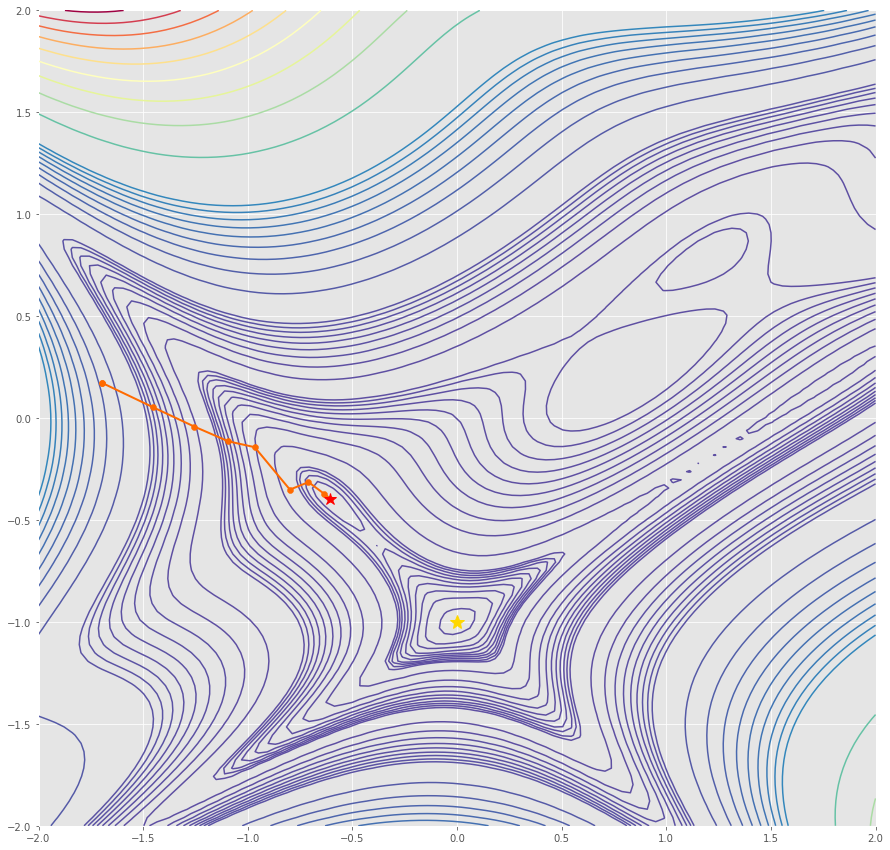

Best point we got is: [-0.6053461119134252, -0.3948960133685434] with value = 30.012517989294224
From Initial Point [-1.6955154507007122, 0.17217429260061712]
Path length = 10


In [367]:
plot_optim(NM(samples[0]),size=15)

# Here are some points that very nicely shows the algorithm behavior 

STOP


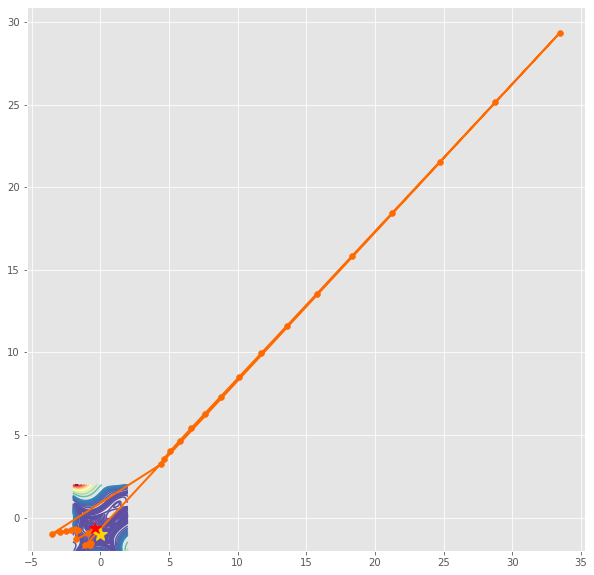

Best point we got is: [-0.395936849157558, -0.605505828789781] with value = 34.99527745892514
From Initial Point [-0.7895897909712257, -1.6708266164171652]
Path length = 31


In [368]:
"""
This staring point goes yet still converges to a local minima
"""
plot_optim(NM([-0.7895897909712257, -1.6708266164171652]))

STOP


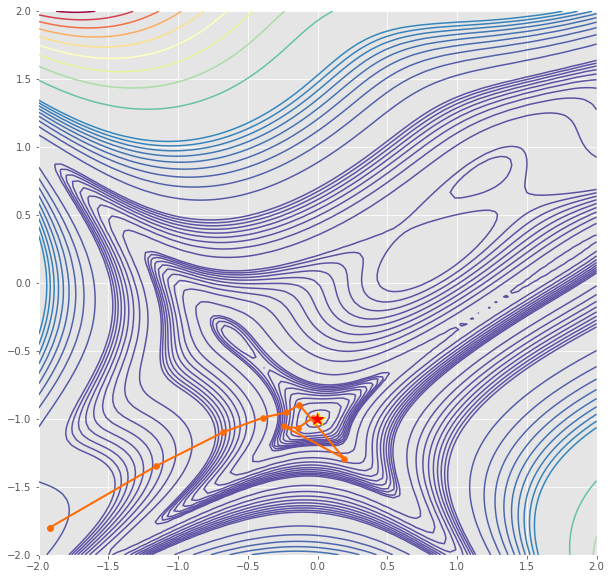

Best point we got is: [-0.001979019691991081, -1.0030107851161374] with value = 3.0036268634251813
From Initial Point [-1.9209630412878091, -1.8005801728398212]
Path length = 12


In [369]:
"""
This  point takes some iterations but the path of convergeance in quite nice
"""
plot_optim(NM([-1.9209630412878091, -1.8005801728398212]))